In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
X, y = make_moons(n_samples=400, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
def train_model(act):
    model = Sequential([
        Dense(8, activation=act, input_shape=(2,)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])
    hist = model.fit(X_train, y_train, epochs=40, verbose=0, validation_data=(X_test, y_test))
    return hist

In [ ]:
acts = ['relu', 'sigmoid', 'tanh']
histories = {a: train_model(a) for a in acts}

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


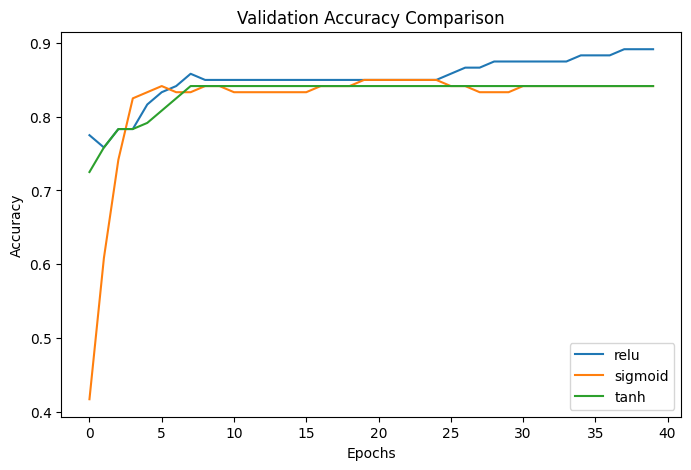

In [ ]:
plt.figure(figsize=(8,5))
for act in activations:
  plt.plot(histories[act].history['val_accuracy'], label=f'{act}')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

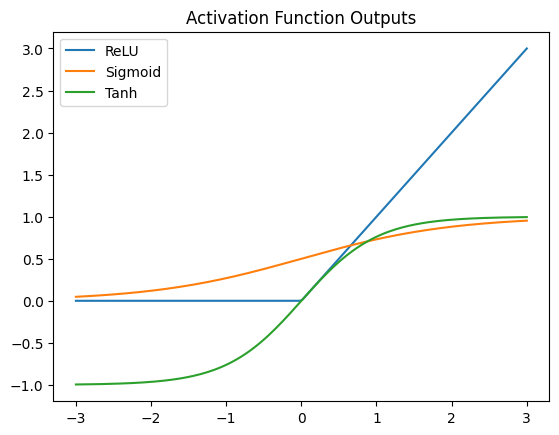

In [ ]:
x = np.linspace(-3, 3, 200)
plt.plot(x, np.maximum(0, x), label='ReLU')
plt.plot(x, 1 / (1 + np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='Tanh')
plt.title('Activation Function Outputs')
plt.legend()
plt.show()